<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #2: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ARIMA models and getting aqcuainted with statistical time series analysis in python.

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (5%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">energy_cunsumption.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ5by4qa_HFqAAoYIg'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot each time series
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
from scipy import stats
from sklearn.grid_search import ParameterGrid

/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/david/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/david/miniconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  Deprecati

In [2]:
mw_ts = pd.read_csv('./data/monthly-wage.csv', delimiter=';', decimal='.', index_col='Month', parse_dates=True)
ec = pd.read_csv('./data/energy_consump.csv', delimiter=',', decimal='.', index_col='Date', parse_dates=True)

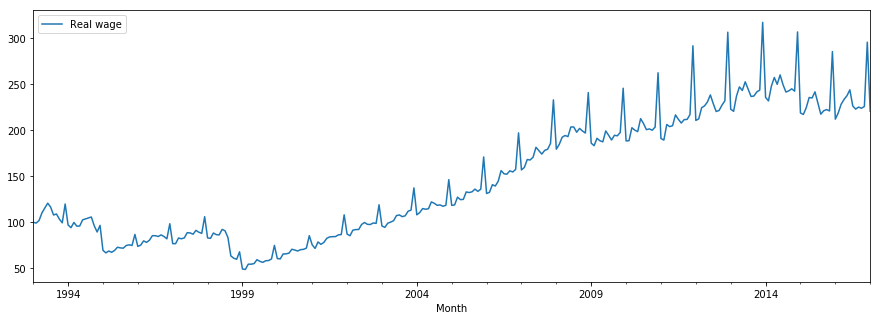

In [3]:
mw_ts.plot(figsize=(15, 5))
plt.show()

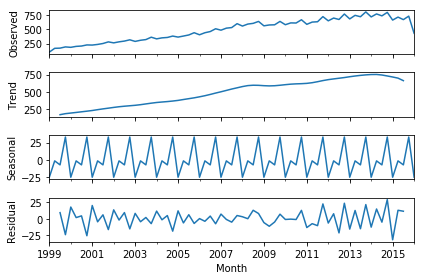

In [4]:
res = sm.tsa.seasonal_decompose(mw_ts['Real wage'].loc['1999-02':'2016-02'].resample('Q').sum())
res.plot()
plt.show()

In [5]:
ec= ec[(ec['ZSP']=='FZSZOE27') & (ec['Hub']=='Center')]

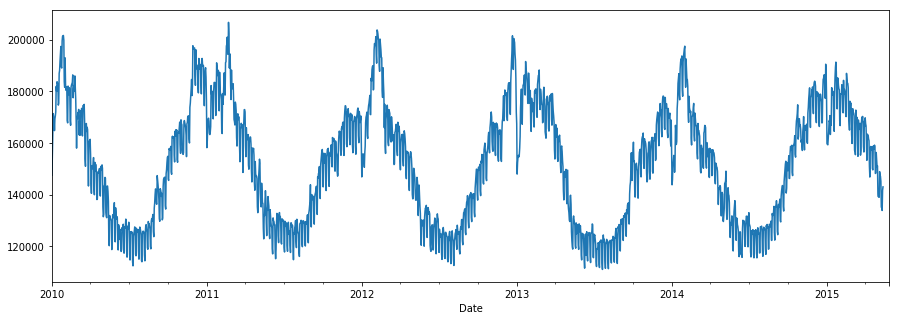

In [6]:
ec['EnergyConsump'].plot(figsize=(15,5))
plt.show()

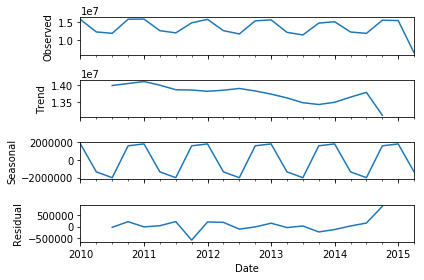

In [7]:
res = sm.tsa.seasonal_decompose(ec['EnergyConsump'].loc['2010-01':'2015-05'].resample('Q').sum())
res.plot()
plt.show()

<h1 align="center">2. ARIMA Momdel for wage dataset (40%) </h1>
You need to analyseTS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span> in accordance with forecasting scheme (see lecture slide Scheme of TS forecasting with ARIMA) and then build forecast.

**I. Select ARIMA parameters your self ** 
Also you can follow the next scheme:
<img src='./pic/ARMA Scheme.png'>


Notes: you need follow to the steps
 * 0) Use data before 01.02.2015 
 * 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
 * 2) Dispersion is stabilized through transformation if needed.
 * 3) If the time series is non-stationary the differentiation degrees is
hosen.
 * 4) ACF/PACF are analyzed in order to understand whether AR(p)/MA(q) and seasonal $AR(P)/MA(Q)$  may be used.
 * 5) Candidate models are trained, their AIC/AIC is compared, choose trhe best model.
 * 6) Unbiasedness, stationarity and non-autocorrelation of the residuals of the obtained model are tested; if the tests fail model modifcations are reviewed.
 * 7) Build forecasts and forecastis interval for period from 01.02.2015 to 01.01.2017
     Calculate loss MACAPE of your Forecast.
     Does the forecast look like appropriate?

In [8]:
def qualityMACAPE(x,y):
    qlt = np.abs(2*(x-y)/(x+y+1e-5)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean()

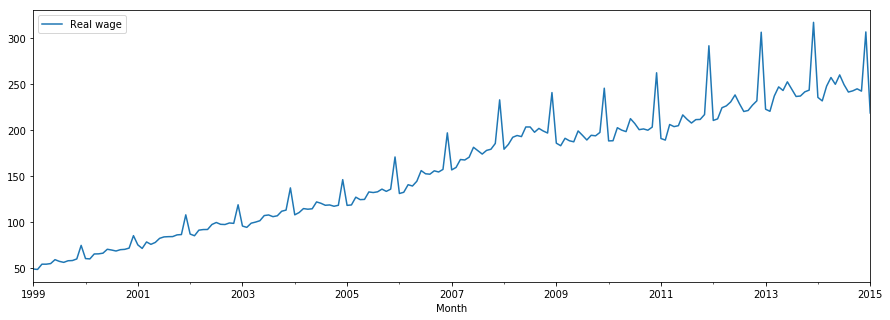

In [9]:
mw = mw_ts['01-01-1999':'01-02-2015']
mw.plot(figsize=(15, 5))
plt.show()

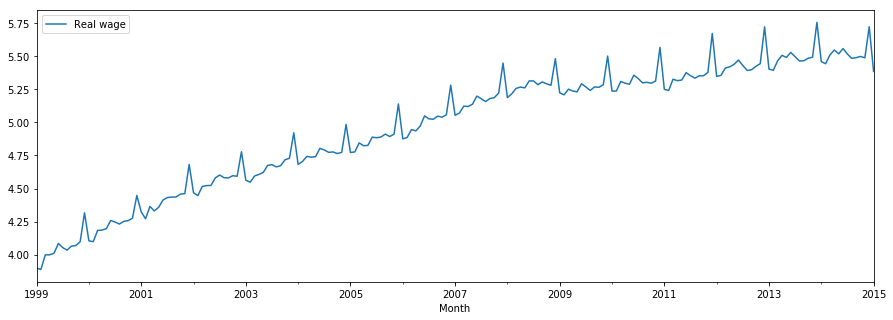

In [10]:
mw = np.log(mw)
mw.plot(figsize=(15, 5))
plt.show()

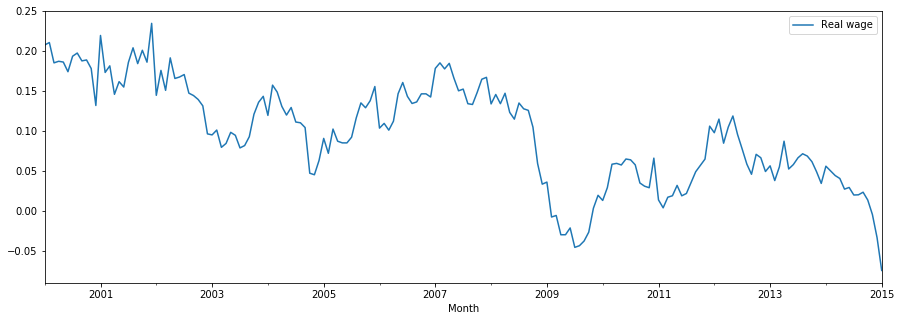

In [11]:
p = 12
mw_diff = (mw - mw.shift(p))[p:]
mw_diff.plot(figsize=(15, 5))
plt.show()

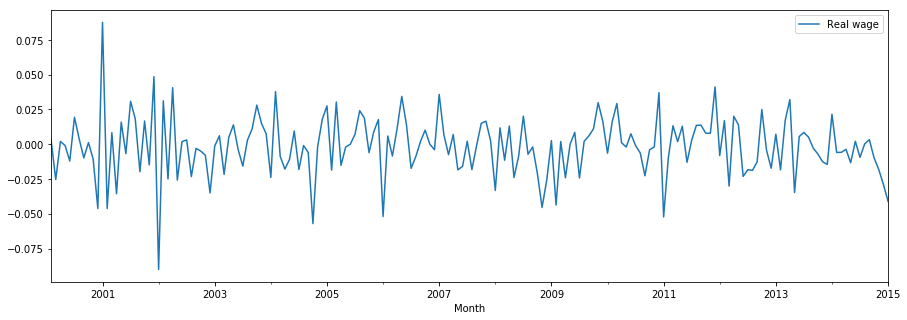

In [12]:
mw_diff_s = (mw_diff - mw_diff.shift(1))[1:]
mw_diff_s.plot(figsize=(15, 5))
plt.show()

In [13]:
stat = stattools.kpss(mw_diff_s.values.T.flatten())
print(stat)

(0.077529673961900775, 0.1, 14, {'5%': 0.463, '1%': 0.739, '2.5%': 0.574, '10%': 0.347})


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [14]:
sm.stats.durbin_watson(mw_diff_s.values)

array([ 2.47526787])

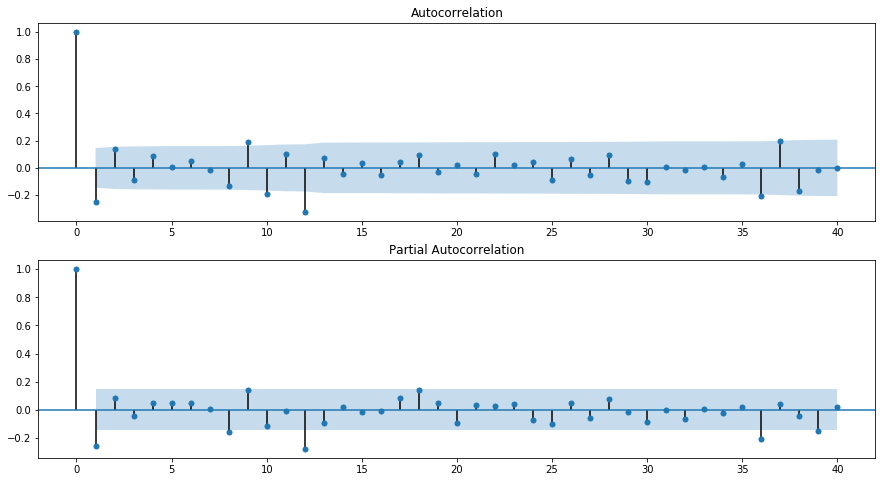

In [15]:
dta = mw_diff_s
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
plt.show()

In [16]:
arma_mod10 = sm.tsa.ARMA(dta, (9,9)).fit()
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

const             -0.001129
ar.L1.Real wage   -0.216776
ar.L2.Real wage    0.446753
ar.L3.Real wage    0.250372
ar.L4.Real wage    0.281316
ar.L5.Real wage    0.057835
ar.L6.Real wage   -0.107296
ar.L7.Real wage   -0.567341
ar.L8.Real wage   -0.228887
ar.L9.Real wage    0.663596
ma.L1.Real wage   -0.030078
ma.L2.Real wage   -0.482393
ma.L3.Real wage   -0.224907
ma.L4.Real wage   -0.211145
ma.L5.Real wage    0.246011
ma.L6.Real wage    0.184939
ma.L7.Real wage    0.526622
ma.L8.Real wage   -0.072496
ma.L9.Real wage   -0.924292
dtype: float64
-887.5212806310019 -823.662143613 -861.629150402


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


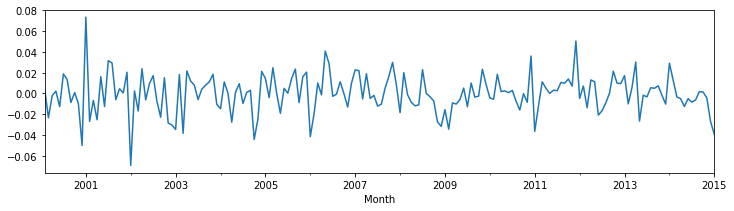

In [17]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax = arma_mod10.resid.plot(ax=ax)
plt.show()

In [18]:
sm.stats.durbin_watson(arma_mod10.resid.values)

2.0643250191315472

In [19]:
stat = stats.wilcoxon(arma_mod10.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 8051.000000
pvalue: 0.89


In [20]:
stats.normaltest(arma_mod10.resid)

NormaltestResult(statistic=10.638244805462662, pvalue=0.0048970494772394221)

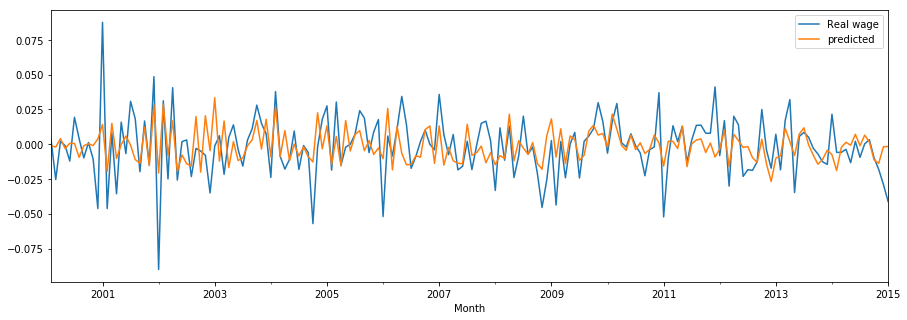

In [21]:
mw_diff_s.dropna().plot(label='diff fist seasonal', figsize=(15, 5))
arma_mod10.predict().plot(label='predicted')
plt.legend()
plt.show()

In [22]:
mw_a = mw_ts['01-01-1999':]
mw_a = np.log(mw_a)
p = 12
mw_diff = (mw_a - mw_a.shift(p))[p:]
mw_diff_s_pred = (mw_diff - mw_diff.shift(1))[1:]

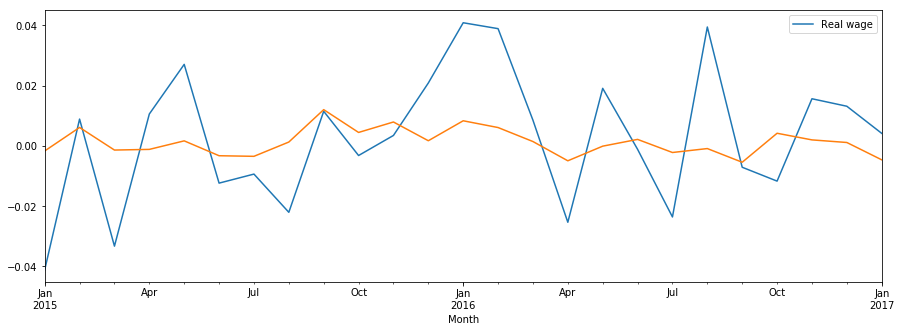

In [23]:
mw_diff_s_pred['01-01-2015':'01-01-2017'].plot()
pred = arma_mod10.predict(start='01-01-2015', end='01-01-2017')
pred.plot(figsize=(15, 5))
plt.show()

In [24]:
qualityMACAPE(mw_diff_s_pred['01-01-2015' : '01-01-2017']['Real wage'], pred)

3.8870260139677306

**II. Find the best parameters of ARIMA automaticaly** 
* 0) Use data before 01.02.2015 
* 1) Plot the graph of time series, preprocess data (delete tail, make calendar transformation if needed)
* 2) Run grid search for ARIMA parameters (at least for 3 distinct values for $p,q,d, P, Q, D$). 
How many time does it take?
* 4) Find the best set of parameters according to AIC.
* 5) Build the forecast of the best model and it's forecasting interval for period from 01.02.2015 to 01.01.2017.
* 6) Calculate locc MACAPE of your forecast.

In [25]:
grid = ParameterGrid({'p': [1, 2], 'd': [1], 'q': [1, 3, 5], 
                      'P': [1, 2], 'D': [1], 'Q': [1, 3, 5]})

In [26]:
mw = mw_ts['01-01-1999':'01-02-2015']
for param in grid:
    try:
        sarimax = sm.tsa.statespace.SARIMAX(mw, 
                                            order=(param['p'], param['d'], param['q']), 
                                            seasonal_order=(param['P'], param['D'], param['Q'], 12)).fit()
        tts = sarimax.predict(start='01.01.2015', end='01.01.2017')
        tts = tts.to_frame(name='Real wage')
        qlt = qualityMACAPE(tts['01.01.2015':'01.01.2017'], mw_ts['01.01.2015':'01.01.2017'])[0]
        print("p: %d, d: %d, q: %d, P: %d, D: %d, Q: %d, MACAPE: %f, AIC: %f" % (param['p'], param['d'], param['q'], param['P'], param['D'], param['Q'], qlt, sarimax.aic))
    except:
        print('Cant fit')

p: 1, d: 1, q: 1, P: 1, D: 1, Q: 1, MACAPE: 0.052719, AIC: 985.837978
p: 1, d: 1, q: 3, P: 1, D: 1, Q: 1, MACAPE: 0.074675, AIC: 988.983118
p: 1, d: 1, q: 5, P: 1, D: 1, Q: 1, MACAPE: 0.151083, AIC: 984.671367
p: 2, d: 1, q: 1, P: 1, D: 1, Q: 1, MACAPE: 0.051243, AIC: 988.318352


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


p: 2, d: 1, q: 3, P: 1, D: 1, Q: 1, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 5, P: 1, D: 1, Q: 1, MACAPE: nan, AIC: nan
p: 1, d: 1, q: 1, P: 1, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 1, d: 1, q: 3, P: 1, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 1, d: 1, q: 5, P: 1, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 1, P: 1, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 3, P: 1, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 5, P: 1, D: 1, Q: 3, MACAPE: nan, AIC: nan
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
p: 1, d: 1, q: 1, P: 2, D: 1, Q: 1, MACAPE: 0.040639, AIC: 984.313560
p: 1, d: 1, q: 3, P: 2, D: 1, Q: 1, MACAPE: 0.060453, AIC: 987.066070


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 1, d: 1, q: 5, P: 2, D: 1, Q: 1, MACAPE: 0.094480, AIC: 983.323733
p: 2, d: 1, q: 1, P: 2, D: 1, Q: 1, MACAPE: 0.039172, AIC: 986.508092
p: 2, d: 1, q: 3, P: 2, D: 1, Q: 1, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 5, P: 2, D: 1, Q: 1, MACAPE: nan, AIC: nan
p: 1, d: 1, q: 1, P: 2, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 1, d: 1, q: 3, P: 2, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 1, d: 1, q: 5, P: 2, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 1, P: 2, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 3, P: 2, D: 1, Q: 3, MACAPE: nan, AIC: nan
p: 2, d: 1, q: 5, P: 2, D: 1, Q: 3, MACAPE: nan, AIC: nan
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit


In [27]:
sarimax = sm.tsa.statespace.SARIMAX(mw, 
                                    order=(2, 1, 1), 
                                    seasonal_order=(2, 1, 1, 12)).fit()
tts = sarimax.predict(start='01.01.2015', end='01.01.2017')
tts = tts.to_frame(name='Real wage')
qlt = qualityMACAPE(tts['01.01.2015':'01.01.2017'], mw_ts['01.01.2015':'01.01.2017'])[0]
print("Quality MACAPE: ", qlt)

Quality MACAPE:  0.0391716037176


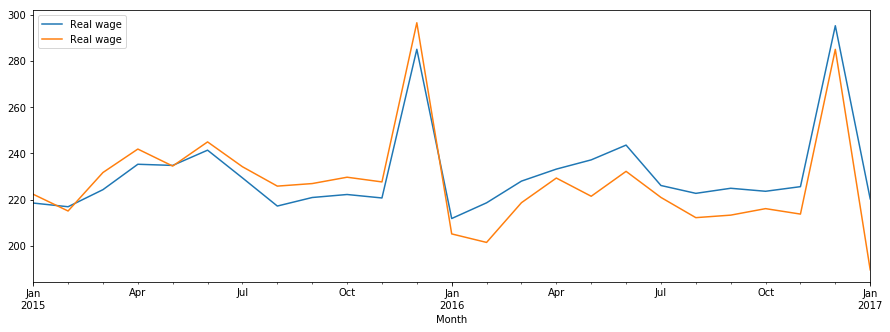

In [28]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = mw_ts['01.01.2015':'01.01.2017'].plot(ax=ax)
ax = tts['01.01.2015':'01.01.2017'].plot(ax=ax)
plt.show()

<h1 align="center">3. ARIMA Momdel for wage dataset (55%) </h1>
You need to analyseTS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">energy_consumption.csv</span> in accordance with forecasting scheme (see lecture slide Scheme of TS forecasting with ARIMA) and then build forecast.

**I. Select ARIMA parameters yourself **
Follow to the steps from 2.I. 

In [29]:
ec = ec.dropna(axis=1, how='all').dropna()

In [30]:
ec.head()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Saturday,Sunday
Date,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,0.0,1.0
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,1.0,0.0
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,0.0,1.0
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,0.0,1.0
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,0.0,1.0


In [31]:
wec = ec.resample('7D').sum()
wec['EnergyConsump'] = np.log(wec['EnergyConsump'])

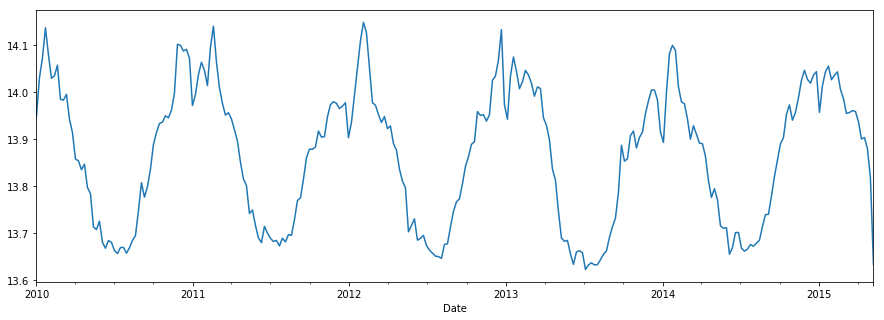

In [32]:
wec['EnergyConsump'].plot(figsize=(15, 5))
plt.show()

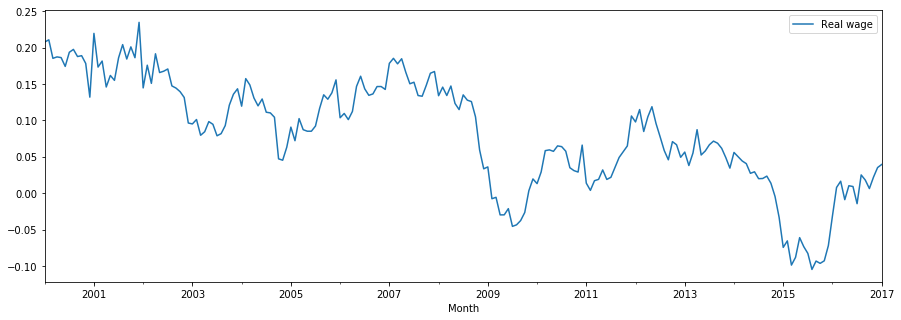

In [33]:
mw_diff_s = (mw_diff - mw_diff.shift(1))[1:]
mw_diff.plot(figsize=(15, 5))
plt.show()

In [34]:
sm.stats.durbin_watson(mw_diff_s.values)

array([ 2.43939251])

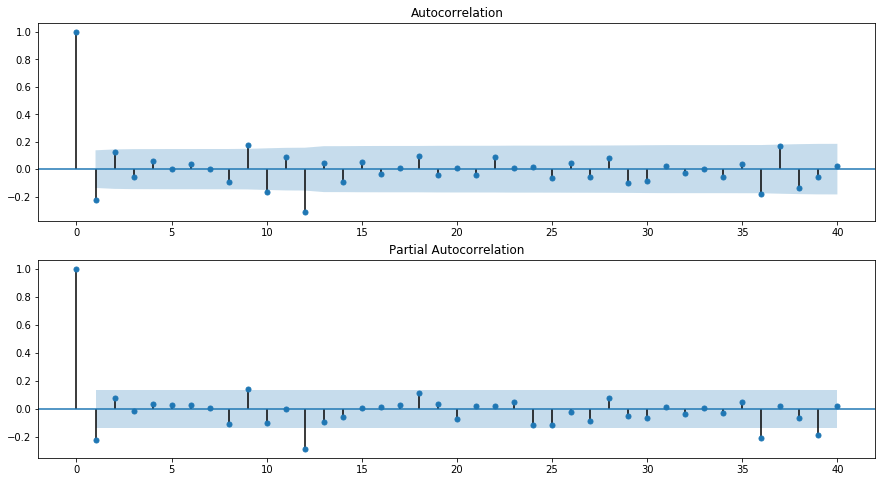

In [35]:
dta = mw_diff_s
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
plt.show()

In [36]:
arma = sm.tsa.ARMA(dta, order=(6, 6)).fit()
print(arma.params)
print(arma.aic, arma.bic, arma.hqic)

const             -0.000819
ar.L1.Real wage    0.887490
ar.L2.Real wage   -0.441274
ar.L3.Real wage    0.683796
ar.L4.Real wage   -0.970496
ar.L5.Real wage    0.192606
ar.L6.Real wage    0.097523
ma.L1.Real wage   -1.153478
ma.L2.Real wage    0.767060
ma.L3.Real wage   -0.941695
ma.L4.Real wage    1.359156
ma.L5.Real wage   -0.544967
ma.L6.Real wage    0.136252
dtype: float64
-987.2069335239973 -940.75325361 -968.415577548


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


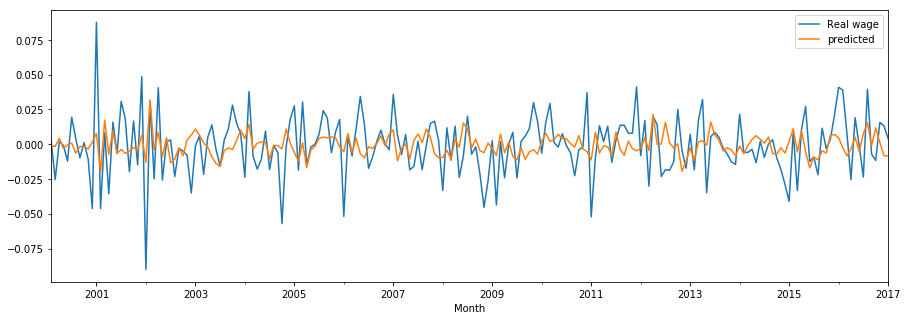

In [50]:
mw_diff_s.dropna().plot(label='diff fist seasonal', figsize=(15, 5))
arma_pred = arma.predict()
arma_pred.plot(label='predicted')
plt.legend()
plt.show()

In [51]:
arma_pred = arma_pred.to_frame(name='Real Wage')
qualityMACAPE(mw_diff_s, arma_pred)

Real Wage   NaN
Real wage   NaN
dtype: float64

**II. Find the best parameters of ARIMA automaticaly**

In [39]:
grid = ParameterGrid({'p': [1, 2], 'd': [1], 'q': [1, 3, 5], 
                      'P': [1, 2], 'D': [1], 'Q': [1, 3, 5]})
mw = wec[:'17-10-2014']
for param in grid:
    try:
        sarimax = sm.tsa.statespace.SARIMAX(mw['EnergyConsump'], 
                                            order=(param['p'], param['d'], param['q']), 
                                            seasonal_order=(param['P'], param['D'], param['Q'], 48)).fit()
        tts = sarimax.predict(start='10.10.2014', end='01.05.2015')
        tts = tts.to_frame(name='EnergyConsump')
        qlt = qualityMACAPE(tts['10.10.2014':'01.05.2015'], wec['10.10.2014':'01.05.2015'])[0]
        print("p: %d, d: %d, q: %d, P: %d, D: %d, Q: %d, MACAPE: %f, AIC: %f" % (param['p'], param['d'], param['q'], param['P'], param['D'], param['Q'], qlt, sarimax.aic))
    except:
        print('Cant fit')

p: 1, d: 1, q: 1, P: 1, D: 1, Q: 1, MACAPE: 0.003088, AIC: -726.734508
p: 1, d: 1, q: 3, P: 1, D: 1, Q: 1, MACAPE: 0.003064, AIC: -722.912880


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 1, d: 1, q: 5, P: 1, D: 1, Q: 1, MACAPE: 0.003264, AIC: -720.124142


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, d: 1, q: 1, P: 1, D: 1, Q: 1, MACAPE: 0.003205, AIC: -724.874733


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, d: 1, q: 3, P: 1, D: 1, Q: 1, MACAPE: 0.003080, AIC: -720.676472


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, d: 1, q: 5, P: 1, D: 1, Q: 1, MACAPE: 0.003216, AIC: -718.533658
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
p: 1, d: 1, q: 1, P: 2, D: 1, Q: 1, MACAPE: 0.002680, AIC: -723.320205


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 1, d: 1, q: 3, P: 2, D: 1, Q: 1, MACAPE: 0.003078, AIC: -720.998225


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 1, d: 1, q: 5, P: 2, D: 1, Q: 1, MACAPE: 0.002902, AIC: -716.914058


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, d: 1, q: 1, P: 2, D: 1, Q: 1, MACAPE: 0.002823, AIC: -722.447748


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, d: 1, q: 3, P: 2, D: 1, Q: 1, MACAPE: 0.002843, AIC: -717.937526


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 2, d: 1, q: 5, P: 2, D: 1, Q: 1, MACAPE: 0.002824, AIC: -716.805495
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit
Cant fit


In [68]:
sarimax = sm.tsa.statespace.SARIMAX(mw['EnergyConsump'], 
                                            order=(1, 1, 1), 
                                            seasonal_order=(1, 1, 1, 48)).fit()
tts = sarimax.predict(start='10.10.2014', end='01.05.2015')
tts = tts.to_frame(name='EnergyConsump')
qlt = qualityMACAPE(tts['10.10.2014':'01.05.2015'], wec['10.10.2014':'01.05.2015'])[0]

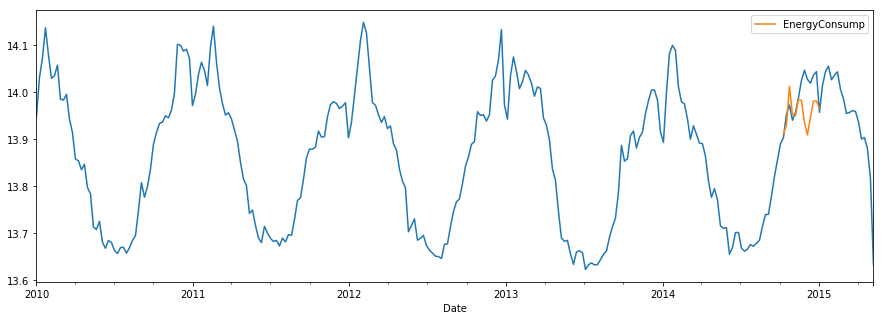

In [69]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = wec['EnergyConsump'].plot(ax=ax)
ax = tts.plot(ax=ax)
plt.show()

** III. Adding of exogenious variables**

* 1) Try to add in models from 3.I. and 3.II exogenious variables (at least one of Temp1, Temp2, Saturday and Sunday).
* 2) Does it make accuracy of foreacast for period from 01.02.2015 to 01.01.2017 better?

In [119]:
mw_train = ec[:'17-10-2014']
exog_train = ec[:'17-10-2014'][['Temp1', 'Temp2', 'Saturday', 'Sunday']]
exog_test = ec['10.10.2014':'01.05.2015'][['Temp1', 'Temp2', 'Saturday', 'Sunday']]

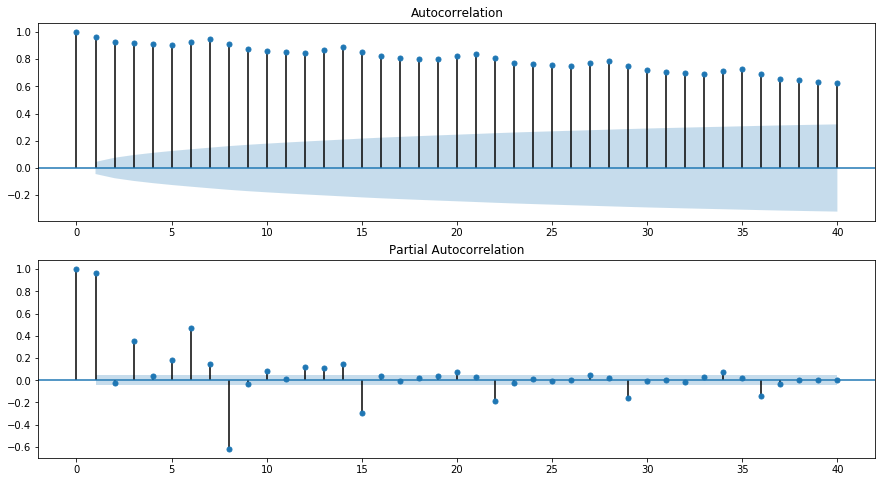

In [120]:
dts = mw_train['EnergyConsump']
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
plt.show()

In [143]:
sarimax = sm.tsa.ARIMA(mw_train['EnergyConsump'], order=(6, 2, 7), exog=exog_train).fit()
tts = sarimax.predict(start='10.10.2014', end='01.05.2015', exog=exog_test)
tts = tts.to_frame(name='EnergyConsump')
qlt = qualityMACAPE(tts['10.10.2014':'01.05.2015'], mw_train['10.10.2014':'01.05.2015'])[0]
print(qlt)

2.01654601959


/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


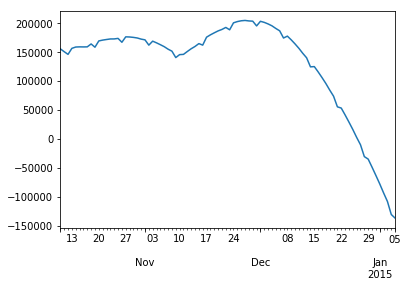

In [166]:
sarimax.predict(start='10.10.2014', end='01.05.2015', exog=exog_test, typ='levels').plot()
plt.show()

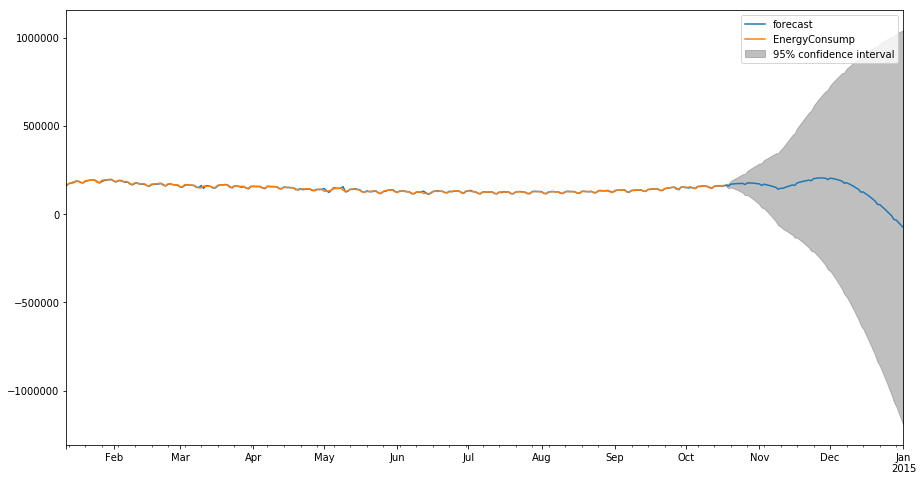

In [165]:
fig, ax = plt.subplots(figsize=(15,8),  linewidth=3.0)
sarimax.plot_predict(start='2014-01-12', end='01.01.2015', exog=exog_test, ax=ax)
plt.show()